In [4]:
import sys
import json
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
def load_data(dts):
    path = f'MuP_dataset/{dts}_complete.jsonl'
    try:
        with open(path, 'r') as json_file:
            json_list = list(json_file)
        col_name = ["paper_id","summary"]
    except:
        print(f"Warning: Did not load dataset from {path}")
        return
    summary_df = pd.DataFrame(columns=col_name)
    for json_str in json_list[:]:
        result = json.loads(json_str)
        df = pd.DataFrame([[result["paper_id"], result["summary"]]], columns=col_name)
        summary_df = pd.concat([summary_df,df])
    return summary_df.reset_index(drop=True)

def split_sum_num(df):
    num_paper = df.groupby(['paper_id']).count()
    num_paper['num_paper'] = 1
    num_paper.groupby(['summary']).count()
    num_paper = df.groupby(['paper_id']).count()
    num_paper['num_paper'] = 1
    num_paper.groupby(['summary']).count()
    num_paper.drop('num_paper', inplace=True,axis=1)
    num_paper.sort_values(["summary"])

    df_list = []
    for i in range(0, max(num_paper['summary'])):
        paper_id = (list((num_paper[num_paper["summary"]==(i+1)]).index))
        df_i = df[df.paper_id.isin(paper_id)].sort_values("paper_id")
        df_list.append(df_i.groupby('paper_id').apply(lambda df_: df_[['summary']].values.flatten()).apply(pd.Series).reset_index())
        
    return df_list

In [53]:
dts = "training"
summary_df = load_data(dts)
df_list = split_sum_num(summary_df)

In [21]:
summary_df

,paper_id,summary
0,SP:4d08cdb2de2044bcb574a425b42963b83fbebfbc,This paper investigates kernel ridge-less regr...
1,SP:b80bc890180934092cde037b49d94d6e4e06fad9,This paper presents a novel way of making full...
2,SP:09f2fe6a482bbd6f9bd2c62aa841f995171ba939,This paper proposes a new framework that compu...
3,SP:a1e2218e6943bf138aeb359e23628676b396ed66,This work proposes a deep reinforcement learni...
4,SP:43e525fb3fa611df7fd44bd3bc9843e57b154c66,This paper proposes 3 deep generative models b...
...,...,...
18929,SP:0d872fb4321f3a4a3fc61cf4d33b0c7e33f2d695,This paper presents a RNN-RL based method for ...
18930,SP:4706017e6f8b958c7d0825fed98b285ea2994b59,This paper proposes a new pointwise convolutio...
18931,SP:4706017e6f8b958c7d0825fed98b285ea2994b59,This paper presents a new pointwise convolutio...
18932,SP:63ad3be1dae7ede5c02a847304072c1cbc91b1cb,This paper proposes to model various uncertain...


# Length visualization

In [105]:
summary_df["length"] = summary_df["summary"].apply(lambda x: len(x.split()))
summary_df

,paper_id,summary,length
0,SP:4d08cdb2de2044bcb574a425b42963b83fbebfbc,This paper investigates kernel ridge-less regr...,60
1,SP:b80bc890180934092cde037b49d94d6e4e06fad9,This paper presents a novel way of making full...,77
2,SP:09f2fe6a482bbd6f9bd2c62aa841f995171ba939,This paper proposes a new framework that compu...,74
3,SP:a1e2218e6943bf138aeb359e23628676b396ed66,This work proposes a deep reinforcement learni...,67
4,SP:43e525fb3fa611df7fd44bd3bc9843e57b154c66,This paper proposes 3 deep generative models b...,82
...,...,...,...
18929,SP:0d872fb4321f3a4a3fc61cf4d33b0c7e33f2d695,This paper presents a RNN-RL based method for ...,154
18930,SP:4706017e6f8b958c7d0825fed98b285ea2994b59,This paper proposes a new pointwise convolutio...,77
18931,SP:4706017e6f8b958c7d0825fed98b285ea2994b59,This paper presents a new pointwise convolutio...,95
18932,SP:63ad3be1dae7ede5c02a847304072c1cbc91b1cb,This paper proposes to model various uncertain...,140


Text(0.5, 1.0, 'Summary length distribution')

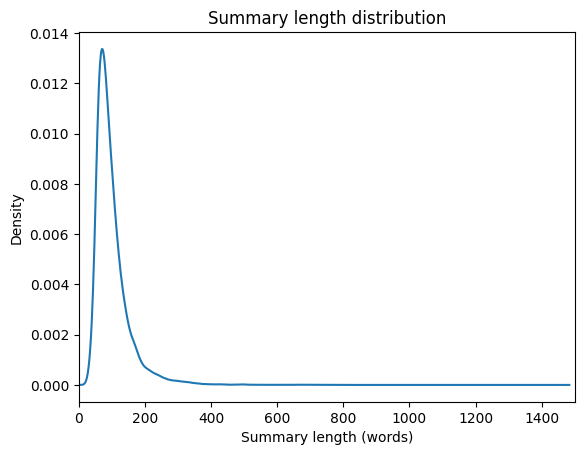

In [108]:

fig, ax = plt.subplots()

summary_df['length'].plot(kind='density', ax=ax, xlim=[0, 1500])

ax.set_xlabel(f"Summary length (words)")

ax.set_title("Summary length distribution")



In [55]:
df_list[1].head()

,paper_id,0,1
0,SP:0007ee9ce7dfaf12a7dff4aa2979403aed9397d7,This paper proposed a novel benchmark for rela...,The paper focuses on the relation extraction t...
1,SP:001a31f7a439ab22943dedb4fa4d46e3dd56e603,This paper is an interesting exploratory study...,This paper explores learning chess from raw no...
2,SP:001e57e71bafdb52d6511bdd6aa73b78d60248f2,The manuscript considers the problem of imitat...,"The paper proposes an imitation method, I2L, t..."
3,SP:004f41dfc870c5a9b347d118d7e41d7c3db77b91,This paper uses pruning and model distillation...,This paper proposes a new framework which comb...
4,SP:00578dd55a640c10dbf22f647b736e49f6ee3c32,"The authors introduce CP-Flows, a way to param...",This paper proposes the flow based representat...


In [83]:
# fig, ax = plt.subplots()
df_length_list = split_sum_num(summary_df)
for n, df_length in enumerate(df_length_list):
    for i in range(n+1):
        df_length[f"length: {i+1}"] = df_length[i].apply(lambda x: len(x.split()))
        # print(len(df))
    df_length["max diff"] = df_length.filter(like='length:').max(axis=1)-df_length.filter(like='length:').min(axis=1)
    df_length["max diff %"] = df_length["max diff"]/df_length.filter(like='length:').min(axis=1)*100
    df_length["mean length"] = df_length.filter(like='length:').max(axis=1)
    # df[f"{i+1} summaries"].plot(kind='density', ax=ax, xlim=[0, 2000], legend=True)
df_length_list[1]

,paper_id,0,1,length: 1,length: 2,max diff,max diff %,mean length
0,SP:0007ee9ce7dfaf12a7dff4aa2979403aed9397d7,This paper proposed a novel benchmark for rela...,The paper focuses on the relation extraction t...,91,78,13,16.666667,91
1,SP:001a31f7a439ab22943dedb4fa4d46e3dd56e603,This paper is an interesting exploratory study...,This paper explores learning chess from raw no...,81,111,30,37.037037,111
2,SP:001e57e71bafdb52d6511bdd6aa73b78d60248f2,The manuscript considers the problem of imitat...,"The paper proposes an imitation method, I2L, t...",195,102,93,91.176471,195
3,SP:004f41dfc870c5a9b347d118d7e41d7c3db77b91,This paper uses pruning and model distillation...,This paper proposes a new framework which comb...,76,76,0,0.000000,76
4,SP:00578dd55a640c10dbf22f647b736e49f6ee3c32,"The authors introduce CP-Flows, a way to param...",This paper proposes the flow based representat...,110,82,28,34.146341,110
...,...,...,...,...,...,...,...,...
2840,SP:ff7cdd0d7c011a59c7fc3088f7dbd6145fc3ca72,This paper provides theoretical analysis of gr...,The paper focuses on the link prediction task ...,150,62,88,141.935484,150
2841,SP:ff9b59f83d1d206ef246db96f13b43ac39c54db8,In this paper the authors study stochastic pro...,This paper studies the stochastic proximal poi...,95,71,24,33.802817,95
2842,SP:ffa69b99230ed18f02cbb7acb37cf3cd801ec908,The paper proposes a new GNN architecture base...,"In this paper, the authors proposed a generali...",147,127,20,15.748031,147
2843,SP:ffacc996034978d7851cf8fa7a0ea41f868c9354,This paper extends the work of Hindsight Exper...,Following recent work on Hindsight Experience ...,184,89,95,106.741573,184


Text(0.5, 1.0, 'Different length distribution')

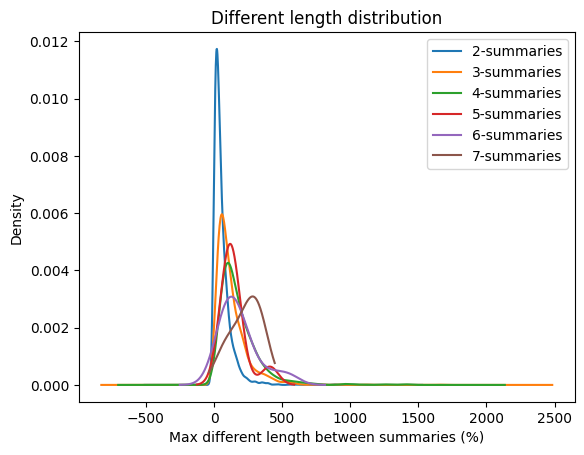

In [109]:
fig, ax = plt.subplots()

for n, df_length in enumerate(df_length_list):
    if n > 0:
        val = pd.DataFrame()
        val[f"{n+1}-summaries"] = df_length["max diff %"]
        val[f"{n+1}-summaries"].plot(kind='density', ax=ax, legend=True)
    
ax.set_xlabel(f"Max different length between summaries (%)")
ax.set_title("Different length distribution")


In [103]:
length_anlaysis_df = pd.DataFrame(columns=["no. of sum", "min", "max"])
for n, df_length in enumerate(df_length_list):
    if n > 0:
        df_ = pd.DataFrame([[n+1, df_length["max diff %"].min(), df_length["max diff %"].max()]],columns=["no. of sum", "min", "max"])
        length_anlaysis_df = pd.concat([length_anlaysis_df, df_], axis=0)
        # print(n+1, df_length["max diff %"].min())
length_anlaysis_df

,no. of sum,min,max
0,2,0.000000,1018.181818
0,3,0.000000,1655.172414
0,4,5.882353,1425.000000
0,5,52.577320,409.259259
0,6,14.772727,547.500000
0,7,83.823529,325.000000


In [ ]:
fig, ax = plt.subplots()

for n, df_length in enumerate(df_length_list):
    if n > 0:
        val = pd.DataFrame()
        val[f"{n}-summaries"] = df_length["max diff"]
        val[f"{n}-summaries"].plot(kind='density', ax=ax, xlim=[0, 1500], legend=True)